In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
x=pd.read_csv("/content/drive/My Drive/Dataset/train.csv")
print(x.shape)
x.head()
x=x.values

(42000, 785)


In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(x[:,1:],x[:,0],shuffle='True')
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(31500, 784) (10500, 784) (31500,) (10500,)


In [0]:
dn=pd.read_csv("/content/drive/My Drive/Dataset/test.csv")
dn=dn.values
xval=dn[:,1:]
yval=dn[:,0]
print(xval.shape,yval.shape)

(28000, 783) (28000,)


In [0]:
#plt.imshow(xtrain[54].reshape(28,28))

In [0]:
def dataprepro(xt):

    #xt=cv2.cvtColor(xt,cv2.COLOR_BGR2GRAY)
    
    #print(xt.shape)
    #plt.imshow(xt)
    xt=xt.reshape(28,28)
    #print(xt.shape)
    #plt.imshow(xt)

    xt=xt.reshape(28,28,1)
    #print(xt.shape)
    return xt/255
    
    
    
    

In [0]:
dataprepro(xtrain[157,:])

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [0]:
xtrain=np.array(list(map(dataprepro,xtrain)))
xtest=np.array(list(map(dataprepro,xtest)))
#xval=np.array(list(map(dataprepro,xval)))


In [0]:
#plt.imshow(xtrain[100])
#xtrain[100]
#show(xtrain[1])

In [0]:
import cv2

In [0]:
def show(img):
    plt.figure()
    plt.imshow(img)
    plt.style.use('seaborn')
    plt.axis('off')

In [0]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Softmax,Activation,Dropout
from keras.utils import to_categorical


In [0]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)
yval=to_categorical(yval)

In [0]:
model=Sequential()
model.add(Conv2D(64,(5,5),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(16,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

#model.add(Dense(30))
#model.add(Activation('sigmoid'))
#model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()





Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 16)         

In [0]:
#Randomly Initializing Wights
model.compile(loss = 'categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.2,rotation_range=10)

In [0]:
datagen.fit(xtrain)

In [0]:
history=model.fit_generator(datagen.flow(xtrain , ytrain,batch_size=128),
         shuffle=True,
         epochs = 20,
         validation_data=(xtest,ytest))

Epoch 1/20
247/247 [==============================] - 38s 154ms/step - loss: 1.7790 - acc: 0.3778 - val_loss: 0.8218 - val_acc: 0.8262
Epoch 2/20
247/247 [==============================] - 37s 149ms/step - loss: 1.0524 - acc: 0.6596 - val_loss: 0.4685 - val_acc: 0.9169
Epoch 3/20
247/247 [==============================] - 37s 149ms/step - loss: 0.8215 - acc: 0.7402 - val_loss: 0.3778 - val_acc: 0.9199
Epoch 4/20
247/247 [==============================] - 37s 148ms/step - loss: 0.6928 - acc: 0.7824 - val_loss: 0.2646 - val_acc: 0.9482
Epoch 5/20
247/247 [==============================] - 37s 150ms/step - loss: 0.6107 - acc: 0.8092 - val_loss: 0.2379 - val_acc: 0.9499
Epoch 6/20
247/247 [==============================] - 37s 149ms/step - loss: 0.5578 - acc: 0.8239 - val_loss: 0.2094 - val_acc: 0.9513
Epoch 7/20
247/247 [==============================] - 37s 149ms/step - loss: 0.5094 - acc: 0.8424 - val_loss: 0.1897 - val_acc: 0.9568
Epoch 8/20
247/247 [==============================] - 3

In [0]:
import pickle

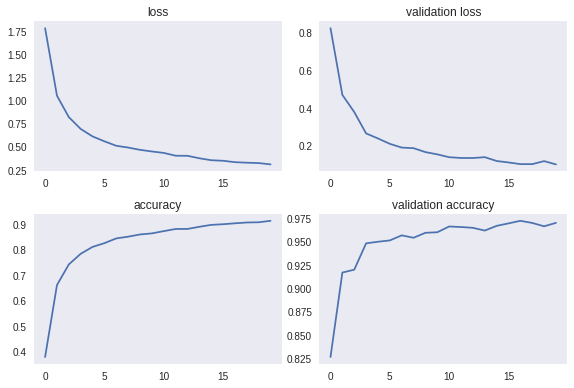

In [0]:
plt.figure()
plt.subplot(2,2,1)
plt.grid()
plt.plot(history.history['loss'])
plt.title("loss")
plt.subplot(2,2,2)
plt.grid()
plt.plot(history.history['val_loss'])
plt.title("validation loss")
plt.subplot(2,2,3)
plt.grid()
plt.plot(history.history['acc'])
plt.title("accuracy")
plt.subplot(2,2,4)
plt.grid()
plt.plot(history.history['val_acc'])
plt.title("validation accuracy")
plt.tight_layout()
plt.show()



In [0]:
pickle_out=open("bestnormalizedone.p","wb")

In [0]:
pickle.dump(model,pickle_out)

In [0]:
pickle_out.close()

(225, 225, 3)
(225, 225)
(225, 225)
(28, 28)


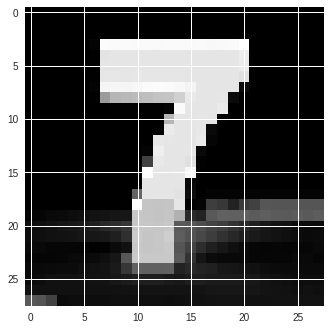

In [0]:
import cv2
img=cv2.imread("/content/drive/My Drive/Dataset/download.jpg")
print(img.shape)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img.shape)

print(img.shape)
img=cv2.resize(img,(28,28))
print(img.shape)


plt.imshow(img)

lets check that bastard

[6]
<built-in method argmax of numpy.ndarray object at 0x7f58c04ba6c0>
[1]
<built-in method argmax of numpy.ndarray object at 0x7f58c0448b20>
[2]
<built-in method argmax of numpy.ndarray object at 0x7f58c04e1f30>
[8]
<built-in method argmax of numpy.ndarray object at 0x7f58c1140d00>
[0]
<built-in method argmax of numpy.ndarray object at 0x7f58c09e0530>


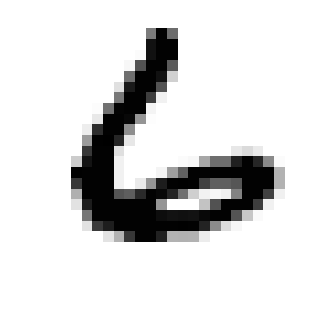

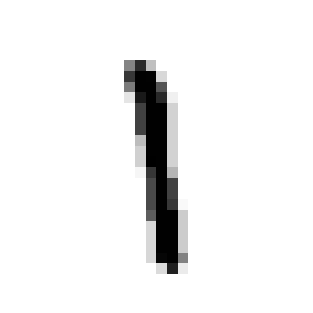

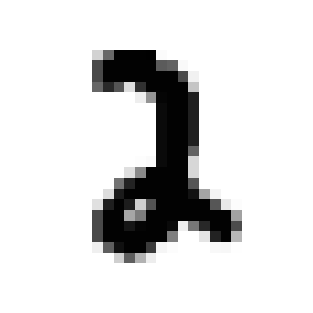

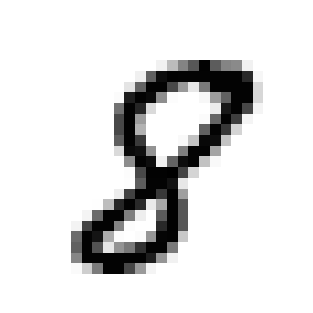

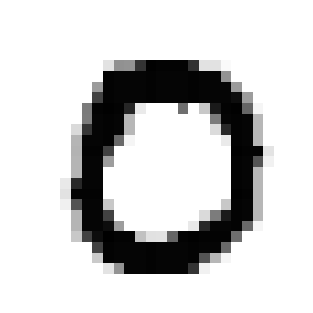

In [0]:
pickle_in=open("bestnormalizedone.p","rb")
model=pickle.load(pickle_in)

x=pd.read_csv("/content/sample_data/mnist_train_small.csv")
x=x.values
im=x[:,1:]
for i in range(100,200,20):
  img=im[i]
  show(img.reshape(28,28))
  img=img.reshape(-1,28,28,1)
  pred=model.predict_proba(img/255)
  pr=model.predict_classes(img)
  print(pr)
  print(pred.argmax)




# New Section